## The Reuters dataset

**chapter 3의 The Reuters dataset을 사용, history graph으로 original, l2 regularization, drop-out 모델의 validation loss를 이용해 비교한 결과이다. **

In [1]:
import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

In [2]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_labels)

8982

In [4]:
len(test_data)

2246

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)


In [6]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## Original model


In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(64, activation='relu'))
original_model.add(layers.Dense(46, activation='softmax'))


original_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
original_hist = original_model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=128, # 데이터가 작은 관계로 조정
                    validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 1s 80us/sample - loss: 1.7251 - accuracy: 0.6324 - val_loss: 1.2440 - val_accuracy: 0.7119
Epoch 2/20
8982/8982 [==============================] - 0s 51us/sample - loss: 0.9064 - accuracy: 0.8010 - val_loss: 1.0442 - val_accuracy: 0.7645
Epoch 3/20
8982/8982 [==============================] - 0s 50us/sample - loss: 0.6129 - accuracy: 0.8682 - val_loss: 0.9460 - val_accuracy: 0.7787
Epoch 4/20
8982/8982 [==============================] - 0s 50us/sample - loss: 0.4295 - accuracy: 0.9087 - val_loss: 0.9725 - val_accuracy: 0.7832
Epoch 5/20
8982/8982 [==============================] - 0s 51us/sample - loss: 0.3152 - accuracy: 0.9331 - val_loss: 0.9461 - val_accuracy: 0.7970
Epoch 6/20
8982/8982 [==============================] - 0s 50us/sample - loss: 0.2497 - accuracy: 0.9417 - val_loss: 1.0311 - val_accuracy: 0.7916
Epoch 7/20
8982/8982 [==============================] - 0s 50us/sample

## l2 regularization

In [19]:
from tensorflow.keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))


l2_model.add(layers.Dense(46, activation='softmax'))

l2_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
l2_model_hist = l2_model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_test,y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 1s 92us/sample - loss: 1.8869 - accuracy: 0.6418 - val_loss: 1.4024 - val_accuracy: 0.7137
Epoch 2/20
8982/8982 [==============================] - 1s 56us/sample - loss: 1.1339 - accuracy: 0.7812 - val_loss: 1.2242 - val_accuracy: 0.7524
Epoch 3/20
8982/8982 [==============================] - 1s 56us/sample - loss: 0.9027 - accuracy: 0.8344 - val_loss: 1.1489 - val_accuracy: 0.7654
Epoch 4/20
8982/8982 [==============================] - 1s 57us/sample - loss: 0.7663 - accuracy: 0.8706 - val_loss: 1.1345 - val_accuracy: 0.7747
Epoch 5/20
8982/8982 [==============================] - 1s 57us/sample - loss: 0.6772 - accuracy: 0.8951 - val_loss: 1.1087 - val_accuracy: 0.7863
Epoch 6/20
8982/8982 [==============================] - 1s 56us/sample - loss: 0.6187 - accuracy: 0.9113 - val_loss: 1.1277 - val_accuracy: 0.7796
Epoch 7/20
8982/8982 [==============================] - 1s 56us/sample

In [12]:
original_hist.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [13]:
l2_model_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### original vs l2-regularization

In [21]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
l2_model_val_loss = l2_model_hist.history['val_loss']

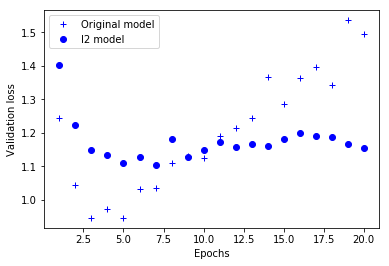

In [22]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, l2_model_val_loss, 'bo', label='l2 model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

l2 모델은 기울기를 유지하며 overfitting을 방지해 주는 것으로 보이지만, epoch 10 전에서는 original model이 성능이 더 좋은 것으로 보인다.

## Adding dropout

In [47]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(64, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(46, activation='softmax'))

dpt_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
dpt_model_hist = dpt_model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 1s 86us/sample - loss: 2.2654 - accuracy: 0.4752 - val_loss: 1.5720 - val_accuracy: 0.6313
Epoch 2/20
8982/8982 [==============================] - 0s 52us/sample - loss: 1.5555 - accuracy: 0.6290 - val_loss: 1.3509 - val_accuracy: 0.6906
Epoch 3/20
8982/8982 [==============================] - ETA: 0s - loss: 1.3330 - accuracy: 0.67 - 0s 52us/sample - loss: 1.3309 - accuracy: 0.6805 - val_loss: 1.2527 - val_accuracy: 0.7039
Epoch 4/20
8982/8982 [==============================] - 0s 52us/sample - loss: 1.1930 - accuracy: 0.7135 - val_loss: 1.1844 - val_accuracy: 0.7275
Epoch 5/20
8982/8982 [==============================] - 0s 52us/sample - loss: 1.0924 - accuracy: 0.7407 - val_loss: 1.1362 - val_accuracy: 0.7516
Epoch 6/20
8982/8982 [==============================] - 0s 52us/sample - loss: 1.0042 - accuracy: 0.7602 - val_loss: 1.1165 - val_accuracy: 0.7587
Epoch 7/20
8982/8982 [======

### original vs drop-out (p=0.5) 

In [49]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
dpt_model_val_loss = dpt_model_hist.history['val_loss']

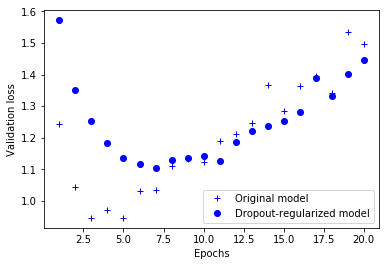

In [50]:
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

p=0.5, 즉 노드를 절반만 선택했을때의 결과이다. original model이 최저점을 기록하고 있으므로 original model이 더 좋은 결과를 보이고 있다.  

p=0.5에서의 드롭아웃 결과가 좋지 못해 p를 0.2로 조정하여 다시 training 시켜 보았다.

In [43]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.2))
dpt_model.add(layers.Dense(64, activation='relu'))
dpt_model.add(layers.Dropout(0.2))
dpt_model.add(layers.Dense(46, activation='softmax'))

dpt_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
dpt_model_hist = dpt_model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 1s 85us/sample - loss: 1.9218 - accuracy: 0.5770 - val_loss: 1.3360 - val_accuracy: 0.6919
Epoch 2/20
8982/8982 [==============================] - 0s 52us/sample - loss: 1.1616 - accuracy: 0.7342 - val_loss: 1.1284 - val_accuracy: 0.7440
Epoch 3/20
8982/8982 [==============================] - 0s 51us/sample - loss: 0.8860 - accuracy: 0.8016 - val_loss: 1.0003 - val_accuracy: 0.7734
Epoch 4/20
8982/8982 [==============================] - 0s 52us/sample - loss: 0.7076 - accuracy: 0.8370 - val_loss: 0.9658 - val_accuracy: 0.7747
Epoch 5/20
8982/8982 [==============================] - 0s 51us/sample - loss: 0.5699 - accuracy: 0.8681 - val_loss: 0.9367 - val_accuracy: 0.7921
Epoch 6/20
8982/8982 [==============================] - 0s 52us/sample - loss: 0.4660 - accuracy: 0.8906 - val_loss: 0.9528 - val_accuracy: 0.7947
Epoch 7/20
8982/8982 [==============================] - 0s 52us/sample

### original vs drop-out (p=0.2)

In [45]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
dpt_model_val_loss = dpt_model_hist.history['val_loss']

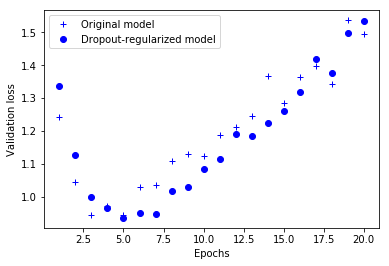

In [46]:
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

p=0.2, 즉 노드의 20%만 선택했을때의 결과이다.   

초반 에포크에서 original 모델이 더 좋은 결과를 보이고 있지만 drop-out 모델이 최저점을 기록하고 있기 때문에 드롭아웃이 좀 더 좋아보인다.